In [1]:
from pyspark.sql import SparkSession
from urllib.request import urlretrieve
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("ADS project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.executor.memory","4G")
    .config("spark.driver.memory","8G")
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

22/08/22 01:44:02 WARN Utils: Your hostname, Luo resolves to a loopback address: 127.0.1.1; using 172.17.1.121 instead (on interface eth0)
22/08/22 01:44:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/22 01:44:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/22 01:44:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/22 01:44:04 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
spark.conf.set("spark.sql.parquet.compression.codec", "gzip")

In [3]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbs
import geopandas as gpd
import folium

In [4]:
YEARS = ['2019', '2021']
MONTHS = range(1, 13)
path = f"../data/curated/tlc_data/"
cols = ['is_weekend', 'is_airport', 'is_rainy']
count = 0
x_axis_labels = ['Trip Distance', 'Fare Amount', 'Average Speed', 'Time Duration', 'Temperature', 'Wind Speend', 'Tip Amount', 'Tip Rate']

In [5]:
def sampling(sdf, year):
    SAMPLE_SIZE = 0.001
    return sdf.sample(SAMPLE_SIZE, seed=0)

In [6]:
# plot the heat map to demonstrate the correlation between each feature and the response: Tip amount and Tip rate
def heat_plot(df, year):
    sbs.set(font_scale=1.4)
    # numeric features that might be included in the later analysis and model
    df = df.select('trip_distance', 'fare_amount', 'average_speed', 'time_duration', \
        'Temperature (F)', 'Wind Speed (mph)', 'tip_amount', 'tip_rate').toPandas()
    # convert the data type into float
    df['Temperature (F)'] = df['Temperature (F)'].astype(float)
    df['Wind Speed (mph)'] = df['Wind Speed (mph)'].astype(float)
    plt.figure(figsize = (14, 14))
    sbs.heatmap(df.corr(), annot = True,annot_kws={"size": 18}, xticklabels= x_axis_labels, yticklabels= x_axis_labels)
    plt.title(f'{year} Pearson Correlation Metric with external', size = 20)
    # save the figure
    plt.savefig(f"../plots/{year} Pearson Correlation Metric with external")
    plt.show()

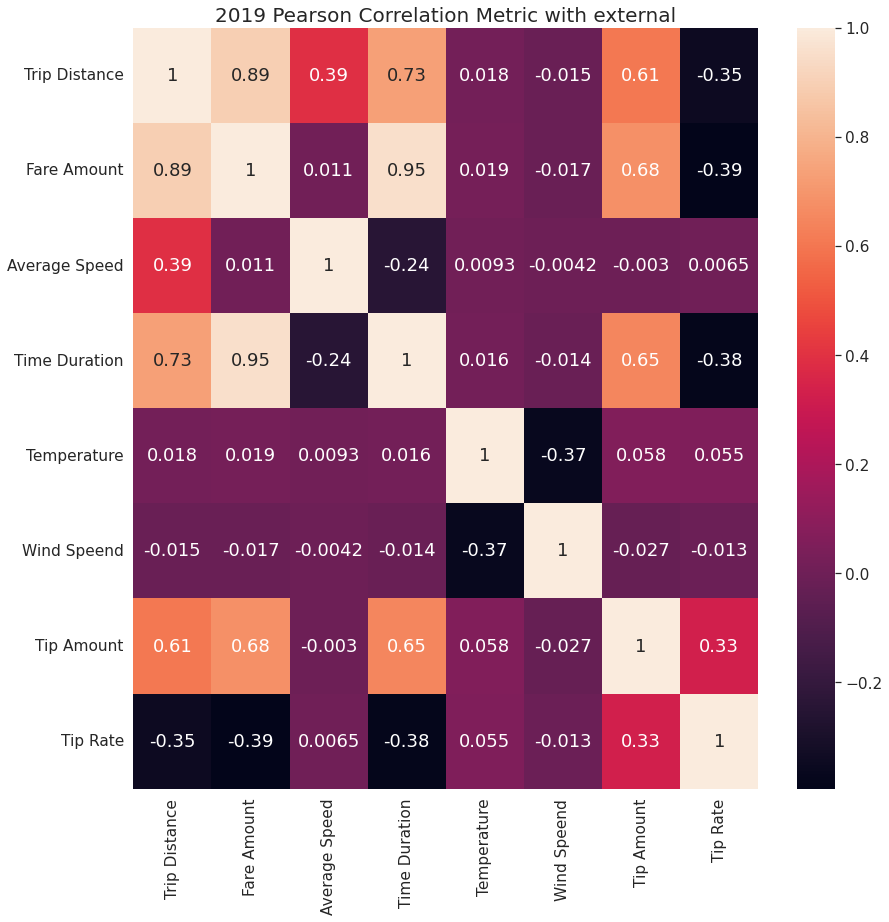

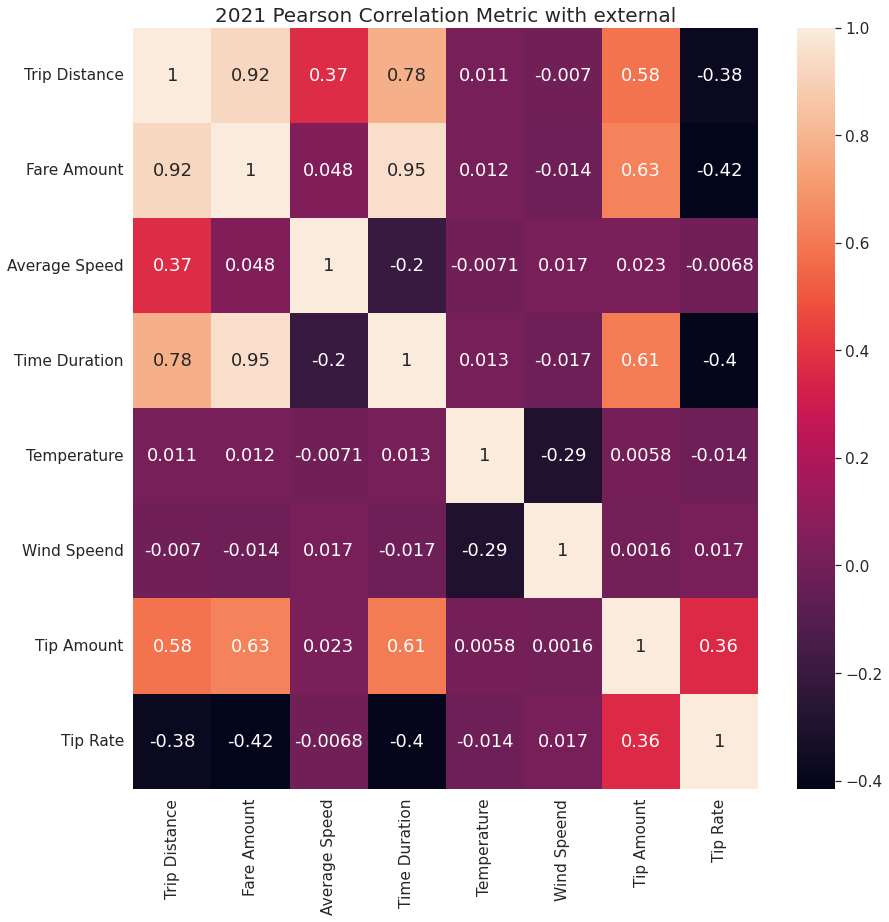

In [7]:
for year in YEARS:
    # plot the heat map for the two years
    sdf = spark.read.parquet(f'{path}{year}/final_data/*/')
    sdf = sampling(sdf, year)
    heat_plot(sdf, year)